In [1]:
import pandas as pd
import numpy as np
from main import load_data
from lifelines.utils import survival_table_from_events
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import OneHotEncoder

2023-03-25 20:54:53,025	ERROR utils.py:595 -- Unexpected error calculating docker cpuset ids.
Traceback (most recent call last):
  File "/home/sam/.cache/pypoetry/virtualenvs/datathon-79NCWFd_-py3.10/lib/python3.10/site-packages/ray/_private/utils.py", line 592, in _get_docker_cpus
    cpu_ids.append(int(num_or_range))
ValueError: invalid literal for int() with base 10: '\n'
2023-03-25 20:54:53,213	INFO worker.py:1544 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [2]:
# Loading in the training dataset from Sam's code.
train = load_data(train=True)
test = load_data(train=False)
display(train, test)

Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,time_elapsed
0,True,P,False,False,I 0-6,True,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2018-07-01,B,6.033333
1,False,P,False,False,I 0-6,True,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-06-01,C,17.200000
2,True,T,False,False,I 7-12,True,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-05-01,A,16.166667
3,True,T,False,True,I 0-6,True,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2018-06-01,B,5.033333
4,True,P,False,False,A,False,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-02-01,B,13.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,False,T,True,False,A,True,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,A,0.000000
5758219,True,I,True,False,A,True,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,C,0.000000
5758220,True,R,True,False,I 0-6,True,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,B,0.000000
5758221,False,T,True,False,Recovery,True,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,B,0.000000


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,time_elapsed
0,True,T,False,False,I 0-6,True,761+,NaN,42,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,B,0.0
1,False,P,False,False,A,True,761+,NaN,48,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,B,0.0
2,False,C,False,False,I 0-6,False,761+,NaN,244,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,A,0.0
3,True,R,False,False,I 0-6,True,621-640,NaN,76,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,A,0.0
4,True,P,False,False,I 0-6,True,761+,NaN,143,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,True,I,True,False,I 13-24,True,621-640,NaN,26,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,A,0.0
19862,False,R,True,False,A,True,641-660,NaN,299,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,C,0.0
19863,True,I,False,False,I 0-6,True,741-760,NaN,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,C,0.0
19864,True,P,True,True,A,True,701-720,NaN,24,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,B,0.0


In [3]:
table = survival_table_from_events(train['time_elapsed'], train['charge_off'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,475284,0,475284,5758223,5758223
0.933333,39665,131,39534,0,5282939
1.000000,157852,460,157392,0,5243274
1.033333,257031,785,256246,0,5085422
1.966667,78929,288,78641,0,4828391
...,...,...,...,...,...
21.266667,36528,99,36429,0,109210
21.333333,18209,51,18158,0,72682
22.266667,18187,46,18141,0,54473


<Axes: xlabel='timeline'>

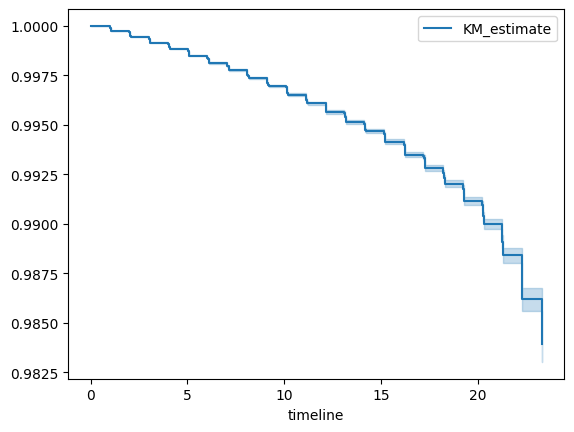

In [4]:
# Plotting a KMF model.
kmf = KaplanMeierFitter()
kmf.fit(train['time_elapsed'], event_observed=train['charge_off'])
kmf.plot_survival_function()

In [ ]:
features = [
    'time_elapsed',
    'charge_off',
    'bank_fico_buckets_20',
    'promotion_flag',
    'ever_delinquent_flg',
    'financial_active',
    'credit_limit_amt',
    'stmt_balance',
    'prev_balance',
    'active',
    'closed',
    'nbr_mths_due',
    'active',
    'closed'
]
def add_features(train):

    # Dropping missing FICO scores.
    train_clean = train[~train['bank_fico_buckets_20'].isin([
        'Missing',
        'Exception'
    ])].copy()

    codes = {
        '<= 560': 0,
        '561-580': 1,
        '581-600': 2,
        '601-620': 3,
        '621-640': 4,
        '641-660': 5,
        '661-680': 6,
        '681-700': 7,
        '701-720': 8,
        '721-740': 9,
        '741-760': 10,
        '761+': 11
    }
    
    # Low/high (1/0) credit score mapping with threshold of 661 based off Google.
    codes_simple = {
        '<= 560': 1,
        '561-580': 1,
        '581-600': 1,
        '601-620': 1,
        '621-640': 1,
        '641-660': 0,
        '661-680': 0,
        '681-700': 0,
        '701-720': 0,
        '721-740': 0,
        '741-760': 0,
        '761+': 0
    }
    
    train_clean.assign(**{
        "bank_fico_buckets_20_code": train_clean["bank_fico_buckets_20"].map(codes),
        "bank_fico_buckets_20_code_simple": lambda df: df["bank_fico_buckets_20"].map(codes_simple),
        "credit_limit_low": lambda df: df["credit_limit_amt"].map(lambda amt: 1.0 if amt < 5_000 else 0.0),
        "balance_diff": lambda df: df["stmt_balance"] - df["prev_balance"],
        "mths_due_high": lambda df: df["nbr_mths_due"].map(lambda nbr_mths: 1.0 if nbr_mths >= 5 else 0.0),
    }).assign(**{
        "low_balance_diff": lambda df: df["balance_diff"].map(lambda bal: 1.0 if bal < 5_000 else 0.0),
    })

    return train_clean
train_clean = add_features(train)

(raylet) [2023-03-25 20:56:54,054 E 2005785 2005785] (raylet) node_manager.cc:3040: 4 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: c39a11e836b96b6e338b4071aa103de7f627b448cc269dc2069951d9, IP: 192.168.1.7) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 192.168.1.7`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


In [ ]:
cph = CoxPHFitter()
features = [
    'time_elapsed', # dependent
    'charge_off', # flag
    'bank_fico_buckets_20_code',
    'promotion_flag',
    'ever_delinquent_flg',
    'financial_active',
    'credit_limit_low',
    'low_balance_diff'
]
cph.fit(train_clean[features], duration_col='time_elapsed', event_col='charge_off')
cph.print_summary()

In [33]:
test_clean = add_features(test)
test_clean

KeyError: "['charge_off', 'bank_fico_buckets_20_code', 'credit_limit_low', 'low_balance_diff'] not in index"

In [ ]:
results = cph.predict_survival_function(test_clean)
s = (10000 - results.sum(axis=1)).values
dates = [f"2020{i:02d}" for i in range(2, 13)] + ["202101"]
pandas.Dataframe.from_records(zip(dates, s [1:] - s[:-1])).to_csv()

# End of the actual analysis

In [30]:
train_sub = train[[
    "charge_off", "time_elapsed", "total_writeoff_amt", "nbr_mths_due"
]].dropna().sample(frac=0.3)
cph = CoxPHFitter()
cph.fit(
    train_sub,
    duration_col='time_elapsed',
    event_col='charge_off',
    show_progress=True,
    fit_options=dict(
        step_size=0.2,
        precision=0.01,
    ),
)
cph.print_summary()

Iteration 1: norm_delta = 13.48664, step_size = 0.2000, log_lik = -63562.03353, newton_decrement = 449370.02652, seconds_since_start = 9.6
Iteration 2: norm_delta = 25967.54855, step_size = 0.0500, log_lik = -388256.95152, newton_decrement = 4766896193.75391, seconds_since_start = 19.8


ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [9]:
train_sub = train.sample(frac=0.1)
features_corr = train_sub.corrwith(train_sub["charge_off"], numeric_only=True).sort_values().dropna()
features_corr.iloc[:20], features_corr[-20:]

(active                       -1.000000
 writeoff_type_null           -0.993659
 credit_limit_amt             -0.056946
 purchase_active              -0.024587
 stmt_balance                 -0.020280
 principal_amt                -0.019070
 credit_limit_pa              -0.017952
 promo_bal_amt                -0.015522
 mob                          -0.013011
 non_principal_amount_net     -0.011176
 non_principal_amount_gross   -0.011045
 non_principal_amount_stmt    -0.010845
 net_payments                 -0.010824
 net_sales                    -0.009175
 net_finance_charge           -0.008143
 due_account_2                -0.007240
 variable_rate_index          -0.005794
 due_balance_2                -0.002918
 writeoff_type_fraud_other    -0.000804
 fraud_writeoff_amt           -0.000144
 dtype: float64,
 promotion_flag              0.022778
 financial_active            0.037675
 prev_balance                0.043218
 recovery_amt                0.146455
 writeoff_type_settlement    0.

In [ ]:
import main
num_nans = pd.isnull(train).sum()
categorical_cols = [
    col
    for col, dtype in train.dtypes.items()
    if str(dtype) == "category" \
        and col != "bank_fico_buckets_20" \
        and col != "charge_off_reason_code"
]

In [ ]:
categorical_cols

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['feature'] = train_sub.columns

train_sub = train_sub.astype(float)

vif['vif'] = [variance_inflation_factor(train_sub.values, i) for i in range(len(train_sub.columns))]

vif

In [182]:
for column in categorical_cols:
    print(column)
    print(train[column].value_counts().to_string())

net_payment_behaviour_tripd
I    2234217
P    1897023
T     932200
R     420828
D     262233
C      11722
account_status_code
A           3512250
I 0-6        851687
I 13-24      595459
I 7-12       535423
I 25+        251312
W             10236
Recovery       1524
MonthEnd        330
Clchange          2
open_closed_flag
1.0    5675212
0.0      83007
industry
B    3426334
A    1305509
C    1026380


In [186]:
train_sub = train[["open_closed_flag", "time_elapsed", "charge_off"]].dropna().sample(frac=0.1)
#.drop(columns=["net_payment_behaviour_tripd_C", "account_status_code_MonthEnd","account_status_code_Clchange", "account_status_code_Recovery"])
cph = CoxPHFitter()
cph.fit(
    train_sub,
    duration_col='time_elapsed',
    event_col='charge_off',
    show_progress=True,
)
cph.print_summary()

Iteration 1: norm_delta = 2.89097, step_size = 0.9500, log_lik = -19672.17108, newton_decrement = 5911.94580, seconds_since_start = 3.0
Iteration 2: norm_delta = 9014155.27707, step_size = 0.9500, log_lik = -37583.18141, newton_decrement = 40820686038.16160, seconds_since_start = 5.9


c:\Python310\lib\site-packages\lifelines\fitters\coxph_fitter.py:1676: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model